##### 3.2 Exercises: Tree Maps, Area Charts, and Stacked Area Charts
##### Name: Prashant Raghuwanshi
##### Date: 01/17/2022
##### Course: DSC640-T301 Data Presentation & Visualization (2223-1)

In [1]:
##### Import common Data preparation libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import squarify
import seaborn as sns

In [2]:
##### read source file unemployement-rate-1948-2010 into dataframe
unemployement_df = pd.read_csv('unemployement-rate-1948-2010.csv')
##### display firt 5 records
unemployement_df.head(5)

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [3]:
##### read source file unemployement-rate-1948-2010 into dataframe
expenditures_df = pd.read_csv('expenditures.txt', '\t')
##### display firt 5 records
expenditures_df.head(5)

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [4]:
##### Create the garphs on top of the provided datases by using Tree Map charts, Area stacked charts, Area charts 

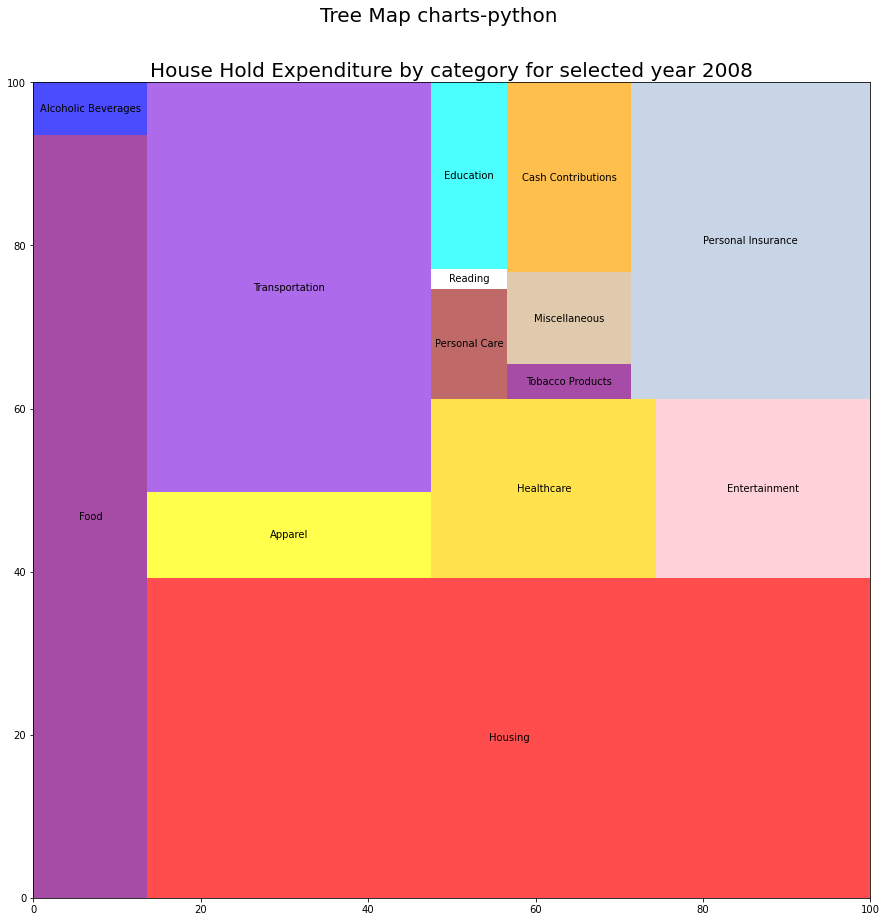

In [5]:
##### Tree Map Graph
##### Creating year_in filter variable
year_in = 2008
plt.figure(figsize=(15,15))
color_list = {'Food':'purple', 'Alcoholic Beverages':'blue', 'Housing':'red', 'Apparel':'yellow', 
              'Transportation':'blueviolet', 'Healthcare':'gold', 'Entertainment':'pink', 'Personal Care':'brown',
              'Reading':'white', 'Education':'aqua', 'Tobacco Products':'purple', 'Miscellaneous':'tan', 'Cash Contributions': 'orange', 'Personal Insurance': 'lightsteelblue'}
c = expenditures_df['category'].apply(lambda x: color_list[x])
# plot tree map
squarify.plot(sizes=expenditures_df[expenditures_df.year == year_in].expenditure, label=expenditures_df[expenditures_df.year == year_in].category, color = c, alpha=0.7)
subtitle_string = f'House Hold Expenditure by category for selected year {year_in}'
title_string = 'Tree Map charts-python'
plt.suptitle(title_string, y=0.95, fontsize=20)
plt.title(subtitle_string, fontsize=20)
plt.show()

In [6]:
#pivoit the dataframe to get the final data by period indexed by year
table = pd.pivot_table(data=unemployement_df,index = ['Year'], columns = ['Period'], values = 'Value')
table

Period,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
Year,,,,,,,,,,,,
1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3
1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1
1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2006,4.7,4.8,4.7,4.7,4.6,4.6,4.7,4.7,4.5,4.4,4.5,4.4
2007,4.6,4.5,4.4,4.5,4.4,4.6,4.6,4.6,4.7,4.7,4.7,5.0
2008,5.0,4.8,5.1,5.0,5.4,5.5,5.8,6.1,6.2,6.6,6.9,7.4


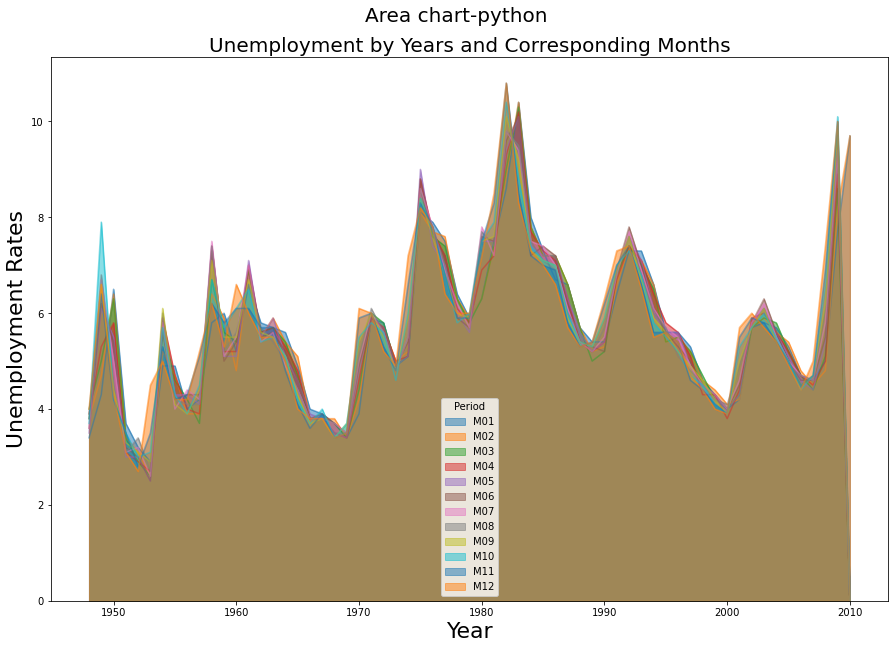

In [7]:
##### Area Chart
table.plot(kind='area', stacked=False, figsize = (15,10))
subtitle_string = 'Unemployment by Years and Corresponding Months'
title_string = 'Area chart-python'
plt.suptitle(title_string, y=0.95, fontsize=20)
plt.title(subtitle_string, fontsize=20)
plt.ylabel("Unemployment Rates", fontsize = 22)
plt.xlabel("Year", fontsize = 22)
plt.show()

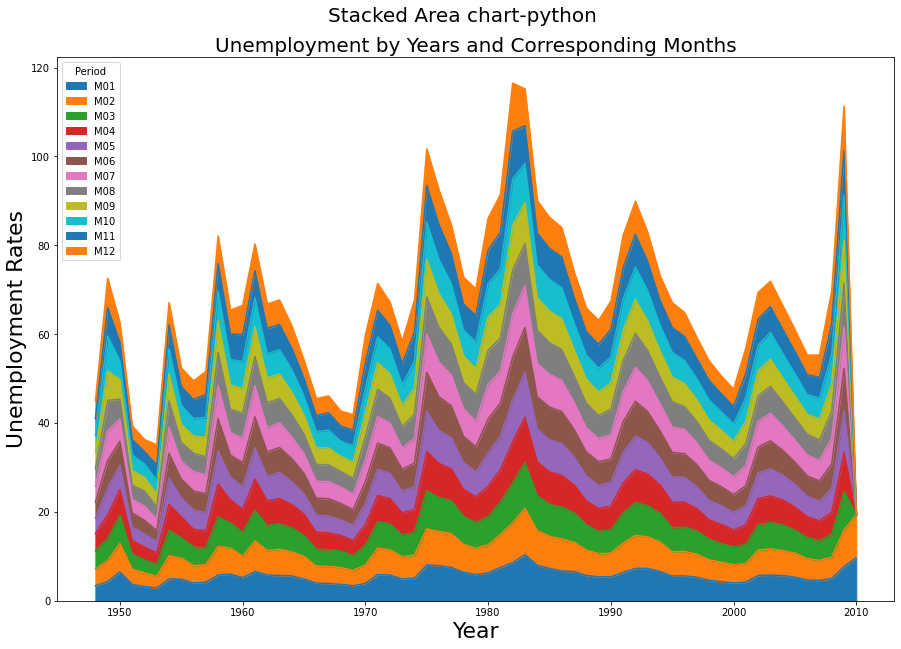

In [8]:
##### SAtack Area Chart
table.plot(kind='area', stacked=True, figsize = (15,10))
subtitle_string = 'Unemployment by Years and Corresponding Months'
title_string = 'Stacked Area chart-python'
plt.suptitle(title_string, y=0.95, fontsize=20)
plt.title(subtitle_string, fontsize=20)
plt.ylabel("Unemployment Rates", fontsize = 22)
plt.xlabel("Year", fontsize = 22)
plt.show()

In [9]:
expenditures_df1 = expenditures_df[expenditures_df.year == year_in]

In [10]:
%load_ext rpy2.ipython

C:\Users\21313711\Anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


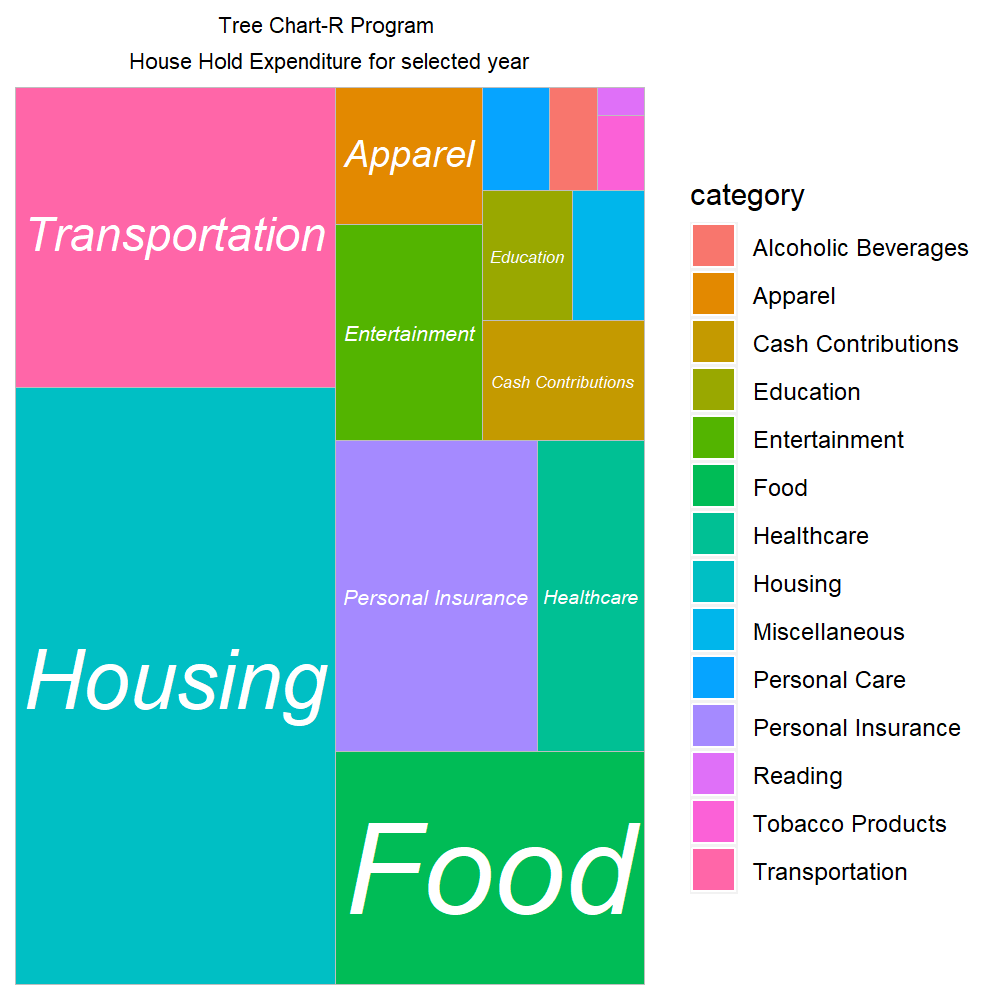

In [11]:
%%R -i expenditures_df1 -w 5 -h 5 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution
#install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("treemapify", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
library(treemapify)
ggplot(expenditures_df1, aes(area = expenditure, fill = category, label = category)) +
  geom_treemap() +
  geom_treemap_text(fontface = "italic", colour = "white", place = "centre",
                    grow = TRUE) + labs(title = "Tree Chart-R Program ",
                                        subtitle = "House Hold Expenditure for selected year") + theme(
                                          plot.title = element_text(hjust = 0.5, size = 8), plot.subtitle = element_text(hjust = 0.5, size = 8))

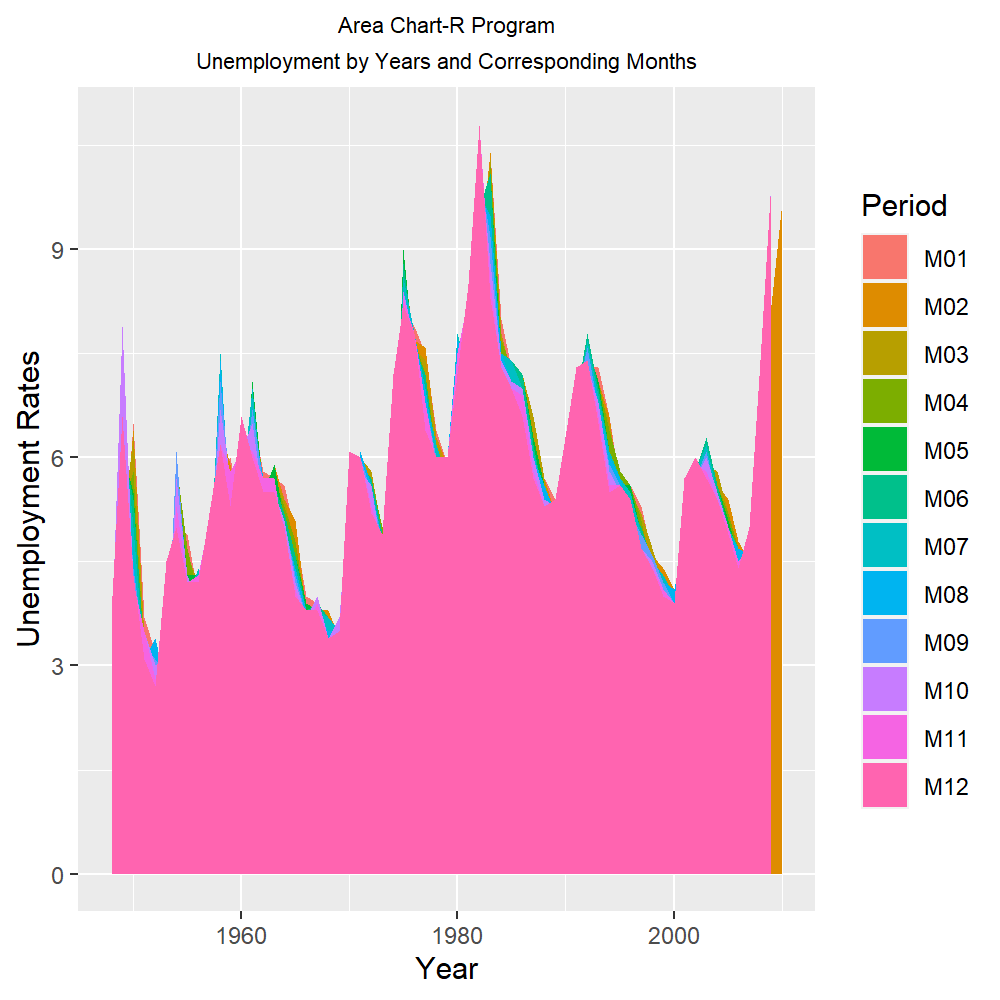

In [12]:
%%R -i unemployement_df -w 5 -h 5 --units in -r 200
plot = ggplot(unemployement_df, aes(x=Year, y=Value, fill=Period))
plot + geom_area(position = position_dodge()) + labs(title = "Area Chart-R Program",
                                        subtitle = "Unemployment by Years and Corresponding Months", y = "Unemployment Rates") + theme(
                                          plot.title = element_text(hjust = 0.5, size = 8), plot.subtitle = element_text(hjust = 0.5, size = 8))

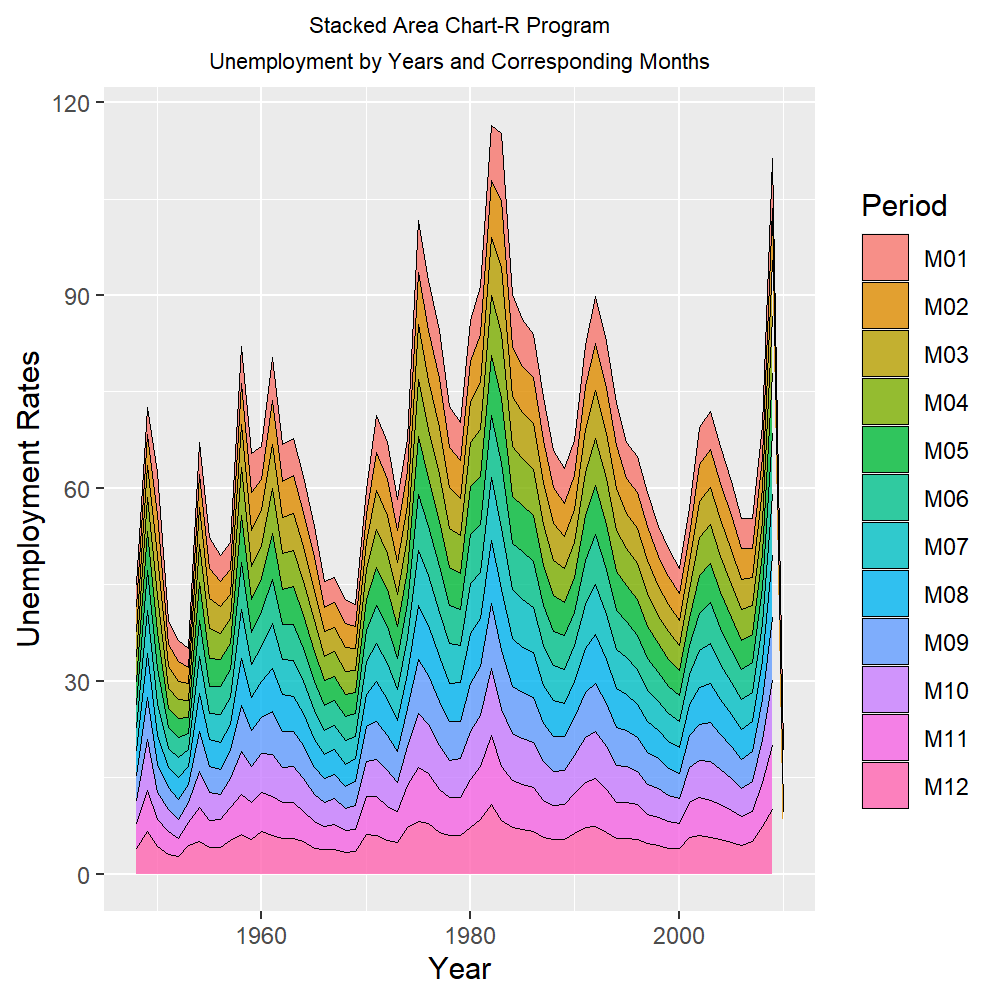

In [13]:
%%R -i unemployement_df -w 5 -h 5 --units in -r 200
#ggplot(unemployement_df, aes(x=Year) + geom_area(stat = "bin") + geom_area(aes(y =value), stat = "bin"))
plot = ggplot(unemployement_df, aes(x=Year, y=Value, fill=Period))
plot + geom_area(position = 'stack', colour="black", size=.2, alpha=.8) + labs(title = "Stacked Area Chart-R Program",
                                        subtitle = "Unemployment by Years and Corresponding Months", y = "Unemployment Rates") + theme(
                                          plot.title = element_text(hjust = 0.5, size = 8), plot.subtitle = element_text(hjust = 0.5, size = 8))